# Basic Setting

In [ ]:
!git clone https://github.com/Math-Jacobs/bfm
!pip install bfm/python
!pip install pot 

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
import sys
sys.path.append('drive/MyDrive/WDHA')

import numpy as np
import matplotlib.pyplot as plt
from metric import *
from functions import *
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['image.cmap'] = 'viridis'

# High-resolution Handwritten Digits

**Images(500x500).npy** and **WriterInfo.npy** can be downloaded through the link : https://drive.google.com/drive/folders/1f2o1kjXLvcxRgtmMMuDkA2PQ5Zato4Or

In [4]:
Images = np.load('/content/drive/My Drive/WDHA/Images(500x500).npy')
WriterInfo = np.load('/content/drive/My Drive/WDHA/WriterInfo.npy')
digit = WriterInfo[:,0]
user = WriterInfo[:,-1]
num_image = 100
num_iter = 300
numbers8 = 255 - Images[(digit == 8)][:num_image].astype('float64')

for j in range(num_image):
    numbers8[j] /= np.sum(numbers8[j])
    numbers8[j] *= 500 * 500
del Images, WriterInfo, user, digit

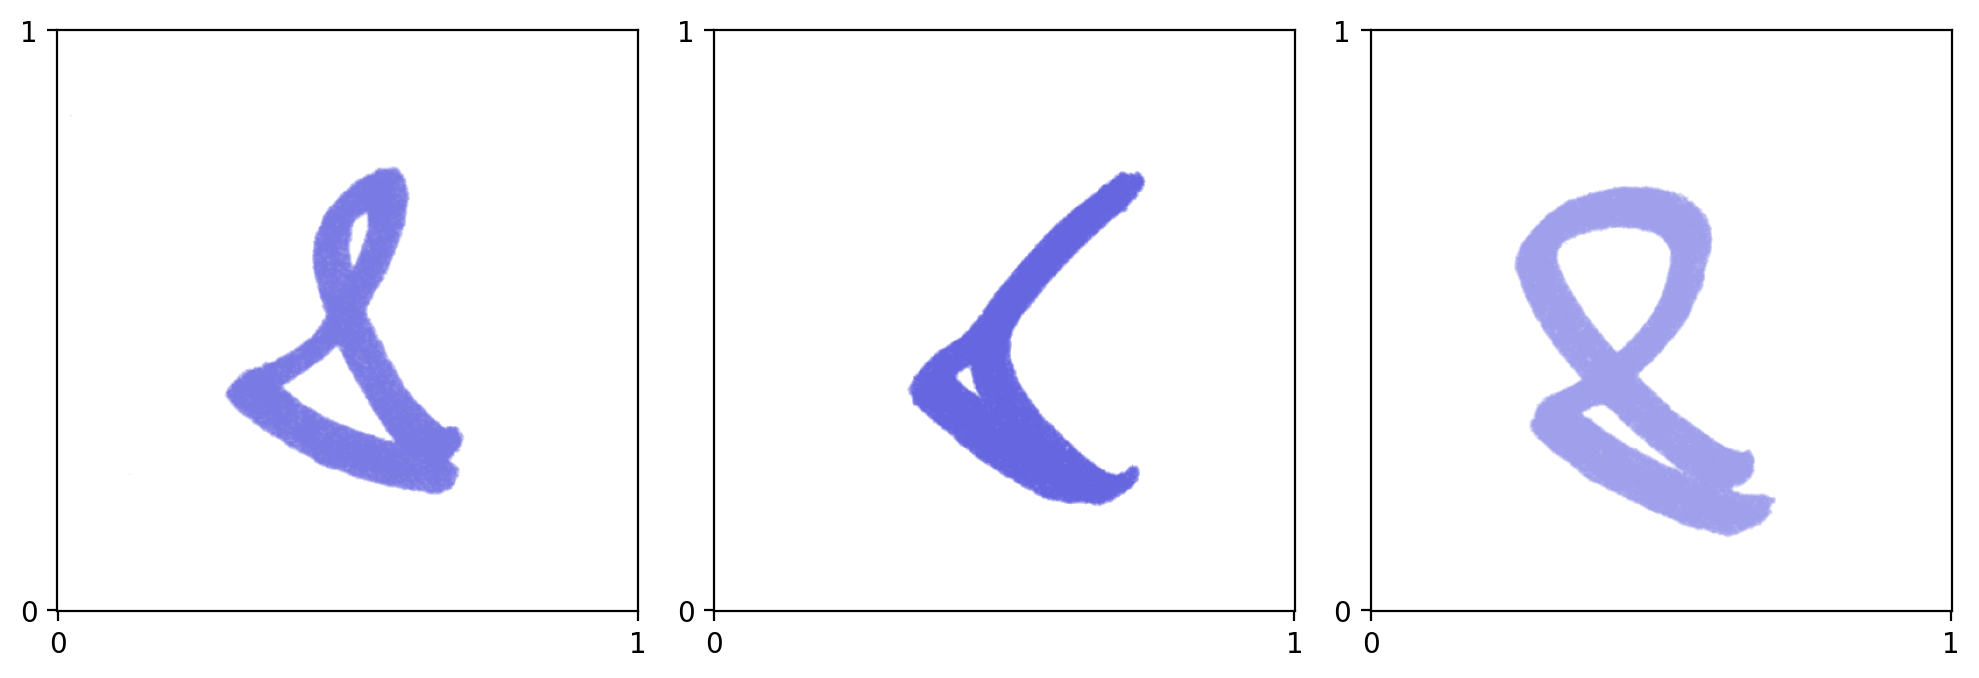

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # 3 rows, 1 column

plotting_mnist(numbers8[0], '', ax=axes[0])
plotting_mnist(numbers8[1], '', ax=axes[1])
plotting_mnist(numbers8[2], '', ax=axes[2])

plt.tight_layout()
plt.show()

The Wasserstein Barycenter for 100 handwritten images of digit 8 computed by WDHA :

Number of Iterations : 50
Number of Iterations : 100
Number of Iterations : 150
Number of Iterations : 200
Number of Iterations : 250
Number of Iterations : 300


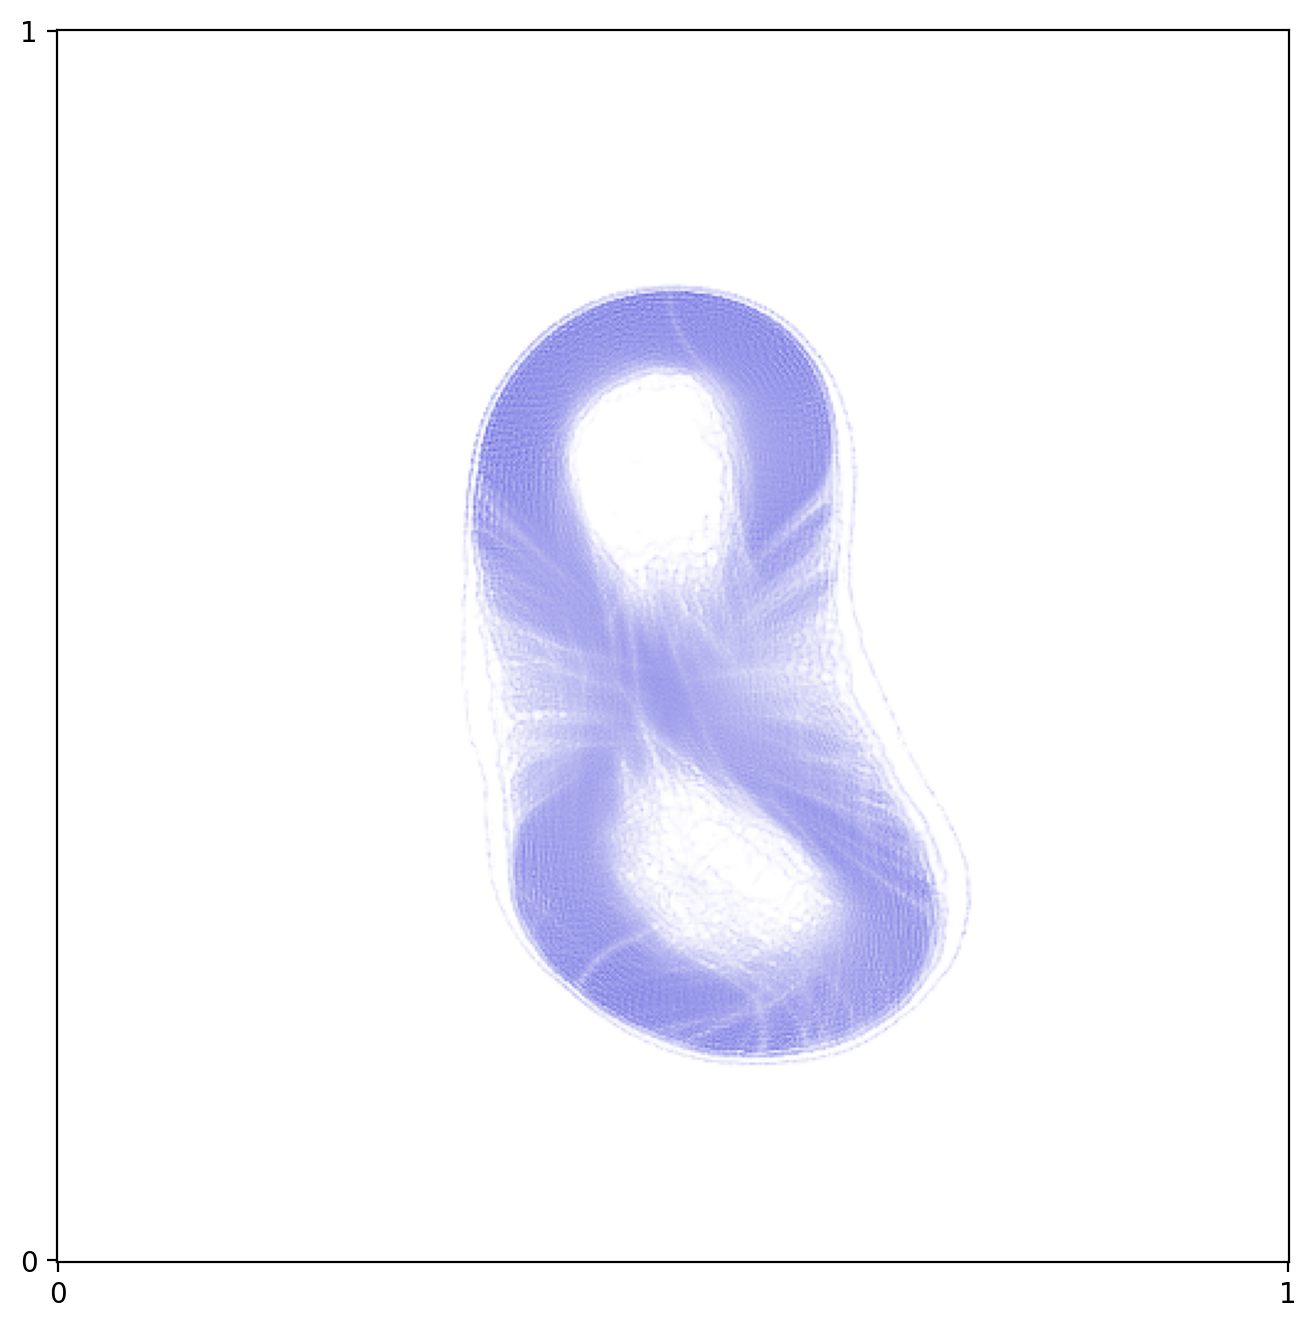

In [6]:
bary8 = frechet_mean(numbers8, num_iter, 'mnist',plot_option = False, save_option = False, return_option = True)
plotting_mnist(bary8, '')